## Описание проекта
Аналитики крупного интернет-магазина вместе с отделом маркетинга подготовили список гипотез для увеличения выручки.  
Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты. 

## Данные
1. Файл `/datasets/hypothesis.csv`  
`Hypothesis` — краткое описание гипотезы;  
`Reach` — охват пользователей по 10-балльной шкале;  
`Impact` — влияние на пользователей по 10-балльной шкале;  
`Confidence` — уверенность в гипотезе по 10-балльной шкале;  
`Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.  
2. Файл `/datasets/orders.csv`  
`transactionId` — идентификатор заказа;  
`visitorId` — идентификатор пользователя, совершившего заказ;  
`date` — дата, когда был совершён заказ;  
`revenue` — выручка заказа;  
`group` — группа A/B-теста, в которую попал заказ.  
3. Файл `/datasets/visitors.csv`  
`date` — дата;  
`group` — группа A/B-теста;  
`visitors` — количество пользователей в указанную дату в указанной группе A/B-теста.

## Загружаем необходимые библиотеки

In [ ]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
import scipy.stats as stats
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

## Приоритизация гипотез

In [ ]:
# запишем датафрейм
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

In [ ]:
# смотрим на содержимое датафрейма
pd.set_option('max_colwidth', 200) # добавляю
display(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [ ]:
# применим фреймворк ICE для приоритизации гипотез, отсортируем их по убыванию приоритета
hypothesis['ICE'] = (hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']).round(2) # добавил .round(2)
display(hypothesis[['Hypothesis', 'ICE']].sort_values(by = 'ICE', ascending = False))

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


In [ ]:
# Применим фреймворк RICE для приоритизации гипотез, Отсортируем их по убыванию приоритета.
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
display(hypothesis[['Hypothesis', 'RICE']].sort_values(by = 'RICE', ascending = False))

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


**Вывод:**  
Самый высокий ICE у 8, 0 и 7 гипотезы.  
Самый высокий RICE у 7, 2, 0 и 6 гипотезы.  
Изменение приоритизации по RICE связано с максимальным значением Reach (затрагиваемый охват пользователей) у 7 гипотезы.  
В нашем случае приоритетными гипотезами будут 7, 2, 0.

## Анализ A/B-теста
A/B тест проведен, необходимо проанализировать результаты

In [ ]:
# записываем получившиеся датафреймы
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [ ]:
# смотрим на получившиеся датафреймы
display(orders)
orders.info()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [ ]:
# смотрим на получившиеся датафреймы
display(visitors)
visitors.info()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [ ]:
# проверяем на наличие явные дубликатов
print('Явных дубликатов по orders:', orders.duplicated().sum())
print('Явных дубликатов по visitors:', visitors.duplicated().sum())

Явных дубликатов по orders: 0
Явных дубликатов по visitors: 0


In [ ]:
# приводим в формату дата по столбцам date обоих датафреймов
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

In [ ]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()
# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cumulativeData)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708
58,2019-08-30,A,545,493,4022970,18037
59,2019-08-30,B,620,567,5774631,18198
60,2019-08-31,A,557,503,4084803,18736


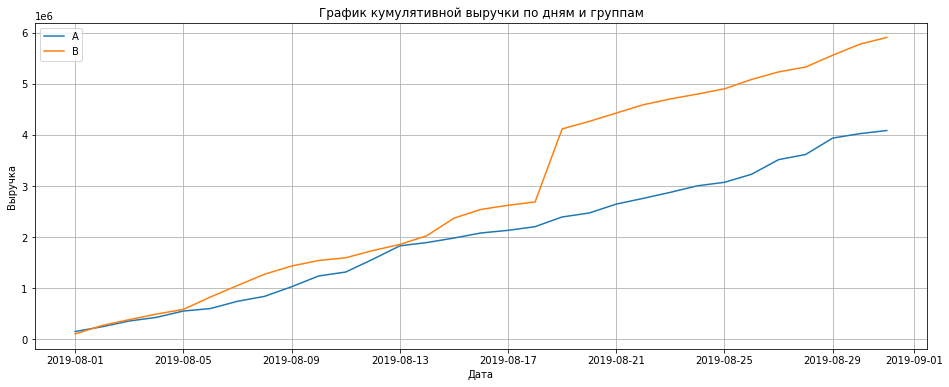

In [ ]:
# строим график кумулятивной выручки по дням и группам

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
# оформляем график
plt.figure(figsize=(16,6)) #добавил
plt.title("График кумулятивной выручки по дням и группам") #добавил
plt.xlabel("Дата") #добавил
plt.ylabel("Выручка") #добавил
plt.grid() #добавил
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
#plt.xticks(rotation=90)
plt.legend()
plt.show()

**Вывод:**  
Выручка по группе В в середине теста (2019-08-17) резко вырастает и продолжает расти значительно превышая выручку по группе А.  
Это может свидетельствовать или о резком росте числа заказов, или об увеличении среднего чека заказов.

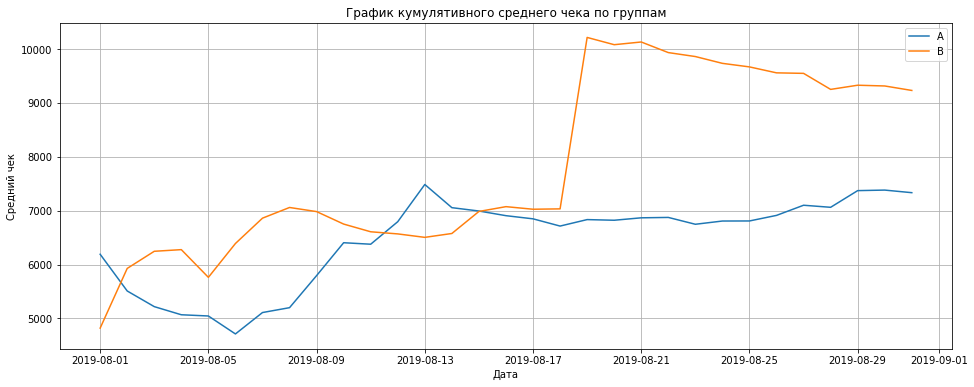

In [ ]:
# построим график кумулятивного среднего чека по группам
# оформляем график
plt.figure(figsize=(16,6)) #добавил
plt.title("График кумулятивного среднего чека по группам") #добавил
plt.xlabel("Дата") #добавил
plt.ylabel("Средний чек") #добавил
plt.grid() #добавил
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
#plt.xticks(rotation=90)
plt.legend()
plt.show()

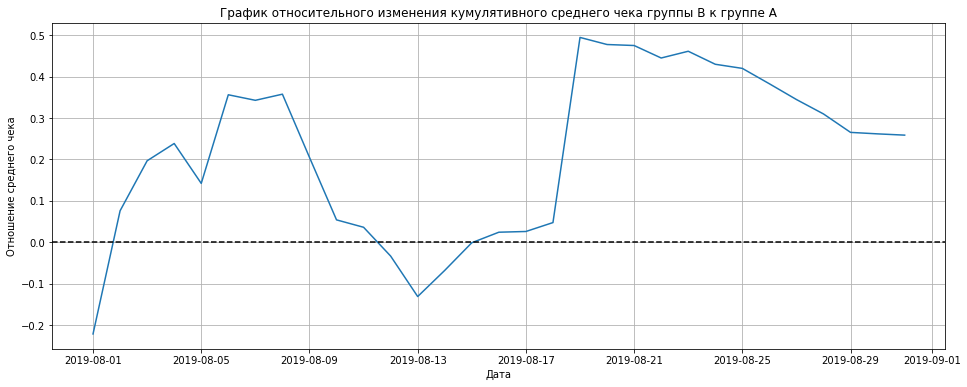

In [ ]:
# строим график относительного изменения кумулятивного среднего чека группы B к группе A
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
# оформляем график
plt.figure(figsize=(16,6)) #добавил
plt.title("График относительного изменения кумулятивного среднего чека группы B к группе A") #добавил
plt.xlabel("Дата") #добавил
plt.ylabel("Отношение среднего чека") #добавил
plt.grid() #добавил
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
#plt.xticks(rotation=90)
plt.show()

**Вывод:**  
Наблюдаются постоянные резкие скачки среднего чека. Вероятно были крупные заказы по группе В.

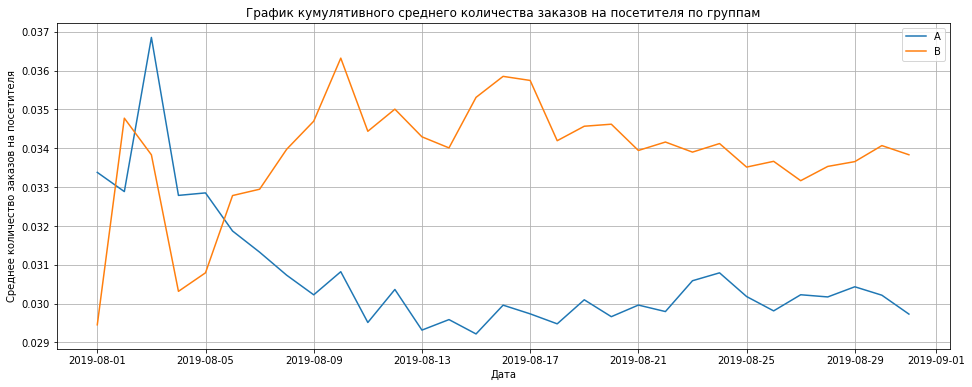

In [ ]:
# строим график кумулятивного среднего количества заказов на посетителя по группам
# датафрейм с кумулятивным средним количеством заказов на посетителя по группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','visitors', 'orders']]
# датафрейм с кумулятивным средним количеством заказов на посетителя по группе В
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','visitors', 'orders']]
# оформляем график
plt.figure(figsize=(16,6)) #добавил
plt.title("График кумулятивного среднего количества заказов на посетителя по группам") #добавил
plt.xlabel("Дата") #добавил
plt.ylabel("Среднее количество заказов на посетителя") #добавил
plt.grid() #добавил
# строим график среднего количества заказов по посетителям по группе А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['orders']/cumulativeRevenueA['visitors'], label='A')
# строим график среднего количества заказов по посетителям по группе В
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['orders']/cumulativeRevenueB['visitors'], label='B')
#plt.xticks(rotation=90)
plt.legend()
plt.show()

**Вывод:**  
По группе В среднее количество заказов на посетителей превышает среднее количество заказов по группе А.

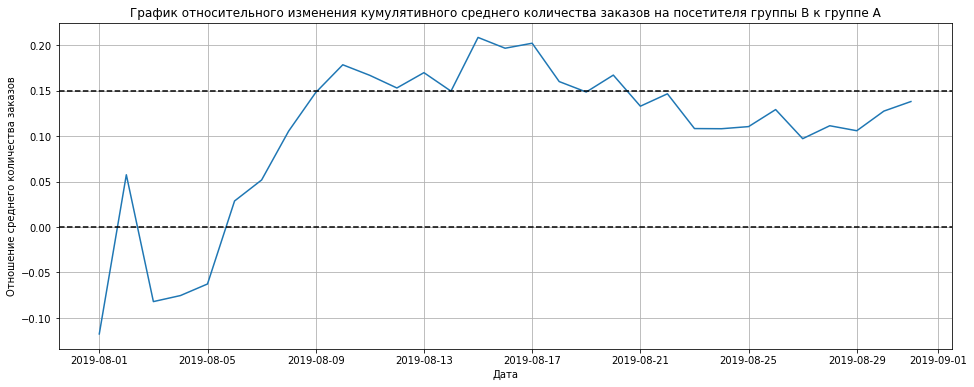

In [ ]:
# строим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
# оформляем график
plt.figure(figsize=(16,6)) #добавил
plt.title("График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A") #добавил
plt.xlabel("Дата") #добавил
plt.ylabel("Отношение среднего количества заказов") #добавил
plt.grid() #добавил
# cтроим отношение среднего количества заказов
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['ordersB']/mergedCumulativeRevenue['visitorsB'])/(mergedCumulativeRevenue['ordersA']/mergedCumulativeRevenue['visitorsA'])-1)
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.axhline(y=0.15, color='black', linestyle='--') #добавил
#plt.xticks(rotation=90)
plt.show()

**Вывод:**  
Резкий всплекск наблюдается 05.08.2019, затем идет плавное снижение. Возможно выброс таким образом влияет на показатели.

,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


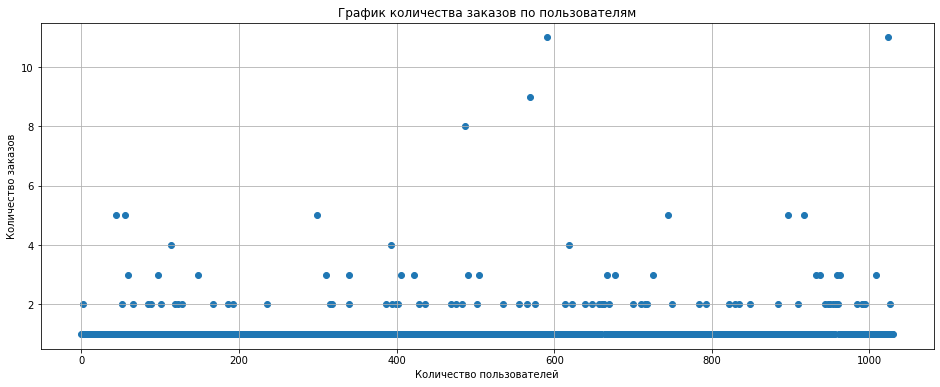

In [ ]:
# строим точечный график количества заказов по пользователям.
# готовим таблицу для исследования по кол-ву заказов
ordersByUsers = orders.groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'})
# переименовываем столбцы
ordersByUsers.columns = ['userId', 'orders']
display(ordersByUsers.sort_values(by='orders', ascending=False).head(10))
# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))
# оформляем график
plt.figure(figsize=(16,6)) #добавил
plt.title("График количества заказов по пользователям") #добавил
plt.xlabel("Количество пользователей") #добавил
plt.ylabel("Количество заказов") #добавил
plt.grid() #добавил
plt.scatter(x_values, ordersByUsers['orders'])
plt.show()

**Вывод:**  
Пользователей, заказавших 2 и более раза немного.

In [ ]:
# посчитаем 95-й и 99-й перцентили количества заказов на пользователя
display(np.percentile(ordersByUsers['orders'], [90, 95, 99]))

array([1., 2., 4.])

**Вывод:**  
Не более 5% посетителей делали 2 заказа, не более 1% делали более 4 заказов.

**Принимаем, что выбросом будет считаться свыше двух заказов.**

,transactionId,revenue
168,590470918,1294500
1107,3936777065,202740
49,192721366,93940
188,666610489,92550
1029,3668308183,86620
322,1216533772,78990
503,1811671147,78990
1000,3603576309,67990
364,1348774318,66350
81,316924019,65710


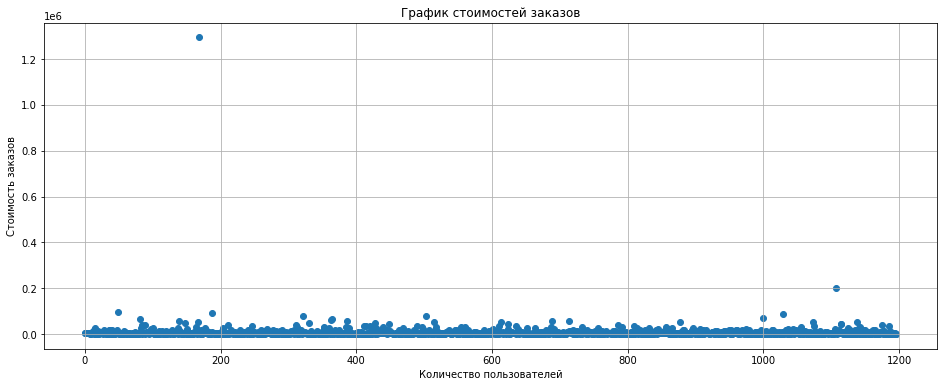

In [ ]:
# построим точечный график стоимостей заказов
# готовим данные для анализа по стоимости заказа
transactionBySumm = orders.groupby('transactionId', as_index=False).agg({'revenue': 'sum'})
# переименовываем столбцы
transactionBySumm.columns = ['transactionId', 'revenue']
display(transactionBySumm.sort_values(by='revenue', ascending=False).head(10))
# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(transactionBySumm)))
# оформляем график
plt.figure(figsize=(16,6)) #добавил
plt.title("График стоимостей заказов") #добавил
plt.xlabel("Количество пользователей") #добавил
plt.ylabel("Стоимость заказов") #добавил
plt.grid() #добавил
plt.scatter(x_values, transactionBySumm['revenue'])
plt.show()

**Вывод:**  
Явно просматривается аномалия - покупка на 1294500 и 202740.

,transactionId,revenue
49,192721366,93940
188,666610489,92550
1029,3668308183,86620
322,1216533772,78990
503,1811671147,78990
1000,3603576309,67990
364,1348774318,66350
81,316924019,65710
363,1347999392,60450
689,2420050534,58550


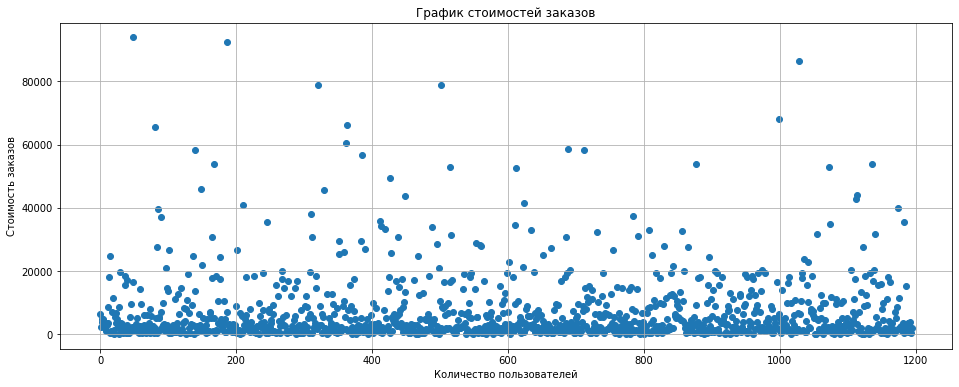

In [ ]:
# исключаем выбросы, строим график заказов
# готовим данные для анализа по стоимости заказа
transactionBySummClear = transactionBySumm[transactionBySumm['revenue'] < 200000]
display(transactionBySummClear.sort_values(by='revenue', ascending=False).head(10))
# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(transactionBySummClear)))
# оформляем график
plt.figure(figsize=(16,6)) #добавил
plt.title("График стоимостей заказов") #добавил
plt.xlabel("Количество пользователей") #добавил
plt.ylabel("Стоимость заказов") #добавил
plt.grid() #добавил
plt.scatter(x_values, transactionBySummClear['revenue'])
plt.show()

In [ ]:
# посчитаем 95-й и 99-й перцентили стоимости заказов
display(np.percentile(transactionBySumm['revenue'], [90, 95, 99]))

array([18168. , 28000. , 58233.2])

**Вывод:**  
Не более чем у 5% посетителей заказы стоят выше 28000 и только у 1% выше 58233.

**Принимаем, что заказы выше 28000 считаются выбросом.**

Проверим **нулевую гипотезу**:  
Статистически значимых различий в среднем количестве заказов по посетителям между группами по "сырым" данным нет.  
и **альтернативную гипотезу**:  
Статистически значимые различия в среднем количестве заказов по посетителям между группами по "сырым" данным есть.  
Принимаем значение alpha = 0.05.  
Применим метод Уилкоксона-Манна-Уитни для двух выборок с вероятными выбросами.

In [ ]:
# посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

#print(data.head(5))

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders'] 

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print('p-value =','{0:.5f}'.format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('Относительное различие между группами В и А =', '{0:.3f}'.format(sampleB.mean()/sampleA.mean()-1)) 

p-value = 0.01679
Относительное различие между группами В и А = 0.138


**Вывод:**  
p-value = 0.01679 - это меньше 0.05, поэтому нулевую гипотезу отвергаем. Анализ "сырых" данных показывает, что в среднем количестве заказов между группами есть статистически значимые различия.  
Относительный прирост среднего группы В к группе А составляет 13,8%.

Проверим **нулевую гипотезу**:  
Статистически значимых различий в среднем чеке заказа по посетителям между группами по "сырым" данным нет.  
и **альтернативную гипотезу**:  
Статистически значимые различия в среднем чеке заказа по посетителям между группами по "сырым" данным есть.  
Принимаем значение alpha = 0.05.  
Применим метод Уилкоксона-Манна-Уитни для двух выборок с вероятными выбросами.

In [ ]:
# посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным
print('p-value =','{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительное различие между группами В и А =','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 


p-value = 0.729
Относительное различие между группами В и А = 0.259


**Вывод:**  
p-value = 0.729 - это больше 0.05, нулевую гипотезу не отвергаем. Статистически значимых отличий в среднем чеке между группами нет.  
Относительное различие между группами составляет 25,9%.

Проверим **нулевую гипотезу**:  
Статистически значимых различий в среднем количестве заказов на посетителя между группами по "очищенным" данным нет.  
и **альтернативную гипотезу**:  
Статистически значимые различия в среднем количестве заказов на посетителя между группами по "очищенным" данным есть.  
Принимаем значение alpha = 0.05.  
Применим метод Уилкоксона-Манна-Уитни для двух выборок с вероятными выбросами.

In [ ]:
#зададим предельные кол-во заказов и сумму покупки для формирования списка аномальных пользователей
limit_orders = np.percentile(ordersByUsers['orders'], 95) # принимаем границу выбросов по количеству заказов
limit_revenue = np.percentile(transactionBySumm['revenue'], 95) # примимаем границу выбросов по сумме заказов

In [ ]:
# посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > limit_orders]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > limit_orders]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > limit_revenue]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
#4
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('p-value =','{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительное различие между группами В и А =','{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value = 0.01304
Относительное различие между группами В и А = 0.173


p-value = 0.01304 - это меньше 0.05, поэтому нулевую гипотезу отвергаем. Анализ "очищенных" данных показывает, что в среднем количестве заказов на посетителя между группами есть статистически значимые различия.
Относительный прирост среднего группы В к группе А составляет 17,3%.

Проверим **нулевую гипотезу**:  
Статистически значимых различий в среднем чеке заказа между группами по "очищенным" данным нет.  
и **альтернативную гипотезу**:  
Статистически значимые различия в среднем чеке заказа между группами по "очищенным" данным есть.  
Принимаем значение alpha = 0.05.  
Применим метод Уилкоксона-Манна-Уитни для двух выборок с вероятными выбросами.

In [ ]:
# посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 
print('p-value =',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительное различие между группами В и А ='
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value = 0.738
Относительное различие между группами В и А =-0.020


**Вывод:**  
После исключения выбросов p-value уменьшился и разница между средними чеками по группам сократилась до 2%.

p-value = 0.738 - это больше 0.05, нулевую гипотезу не отвергаем. Статистически значимых отличий в среднем чеке между группами нет.
Относительное различие между группами В и А составляет -2 %.

**ОБЩИЙ ВЫВОД:**  
1. Нет статистически значимого различия по среднему количеству заказов между группами ни по «сырым», ни по данным после фильтрации аномалий;
2. Есть статистически значимое различие по среднему чеку между группами по «сырым» и по данным после фильтрации аномалий;
3. График различия среднего количества заказов между группами сообщает, что результаты группы B лучше группы A и нет значительной тенденции к улучшению:
4. График различия среднего чека колеблется: он-то и позволил найти аномалии. Сделать из этого графика определённые выводы нельзя.  
Исходя из обнаруженных фактов, тест следует остановить и признать его успешным. Победителем стоит признать группу В, в которой среднее количество заказов значительно выше, чем в группе А.